<a href="https://colab.research.google.com/github/nazimulrahman/Market_Basket_Analysis-Association-Rules/blob/main/Association_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/Groceries Dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [9]:
df.isnull().sum().sort_values(ascending= False)

,0
Member_number,0
Date,0
itemDescription,0


In [11]:
df['Data'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   Data             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


In [12]:
df.head()

,Member_number,Date,itemDescription,Data
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-01-05
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-02-01


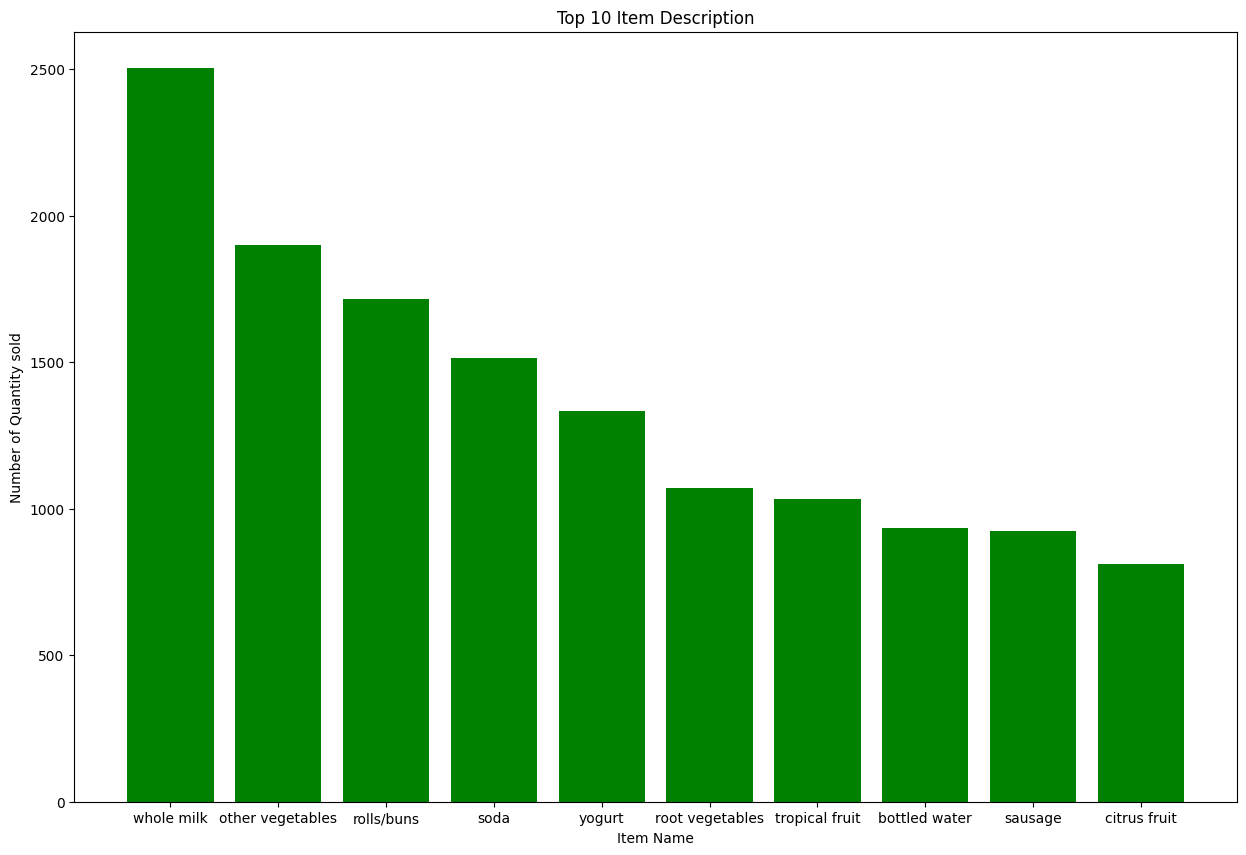

In [19]:
Item_dis = df.groupby(by = 'itemDescription').size().reset_index(name = 'Frequency').sort_values(by = 'Frequency',ascending= False).head(10)
bars = Item_dis['itemDescription']
height = Item_dis['Frequency']
x_pos = np.arange(len(bars))

plt.figure(figsize = (15,10))
plt.bar(x_pos, height, color = 'green')
plt.xlabel('Item Name')
plt.ylabel('Number of Quantity sold')
plt.title('Top 10 Item Description')
plt.xticks(x_pos, bars)
plt.show()

In [21]:
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription,Data
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-01-05
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-02-01
...,...,...,...
08-10-2014,4471,sliced cheese,2014-10-08
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


[Text(0.5, 0, 'date'), Text(0, 0.5, 'number of item sold')]

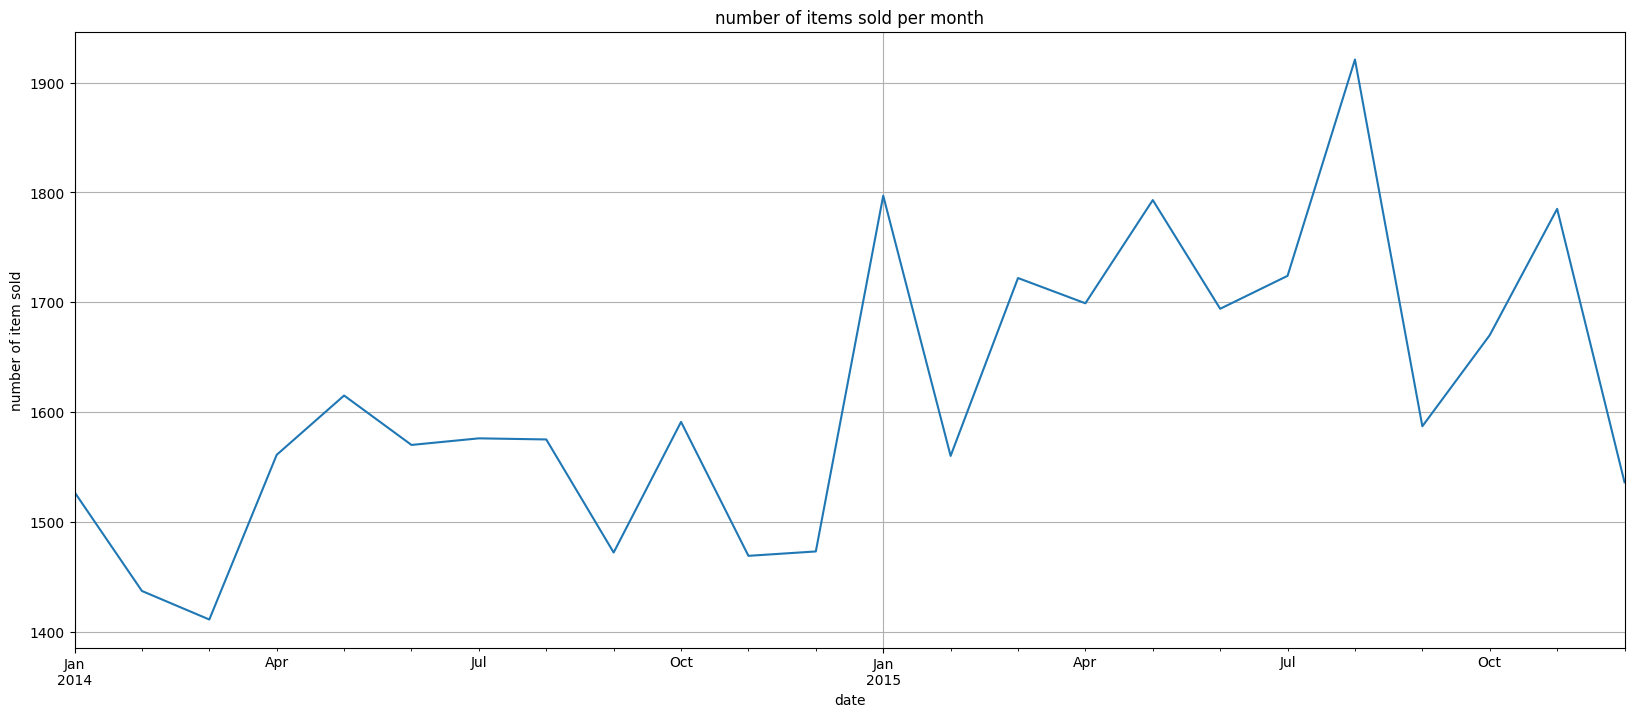

In [27]:
df_date = df.set_index(pd.to_datetime(df['Date']))
df_date.resample('M')['itemDescription'].count().plot(figsize = (20, 8), grid = True, title = 'number of items sold per month').set(xlabel= 'date', ylabel = 'number of item sold')

In [25]:
cust_level = df[['Member_number','itemDescription']].sort_values(by = 'Member_number', ascending= False)
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()
cust_level.head(10)

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
25489,5000,other vegetables
27877,5000,onions
30989,4999,newspapers
23793,4999,yogurt
7644,4999,berries


In [29]:
transaction = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]

# Model Building

In [32]:
!pip install apyori

In [35]:
from apyori import apriori
rules = apriori(transactions = transaction, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2)
association_results = list(rules)

In [36]:
association_results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [40]:
def inspect(association_results):
  lhs = [tuple(result[2][0][0]) for result in association_results]
  rhs = [tuple(result[2][0][1]) for result in association_results]
  supports = [result[1] for result in association_results]
  confidences = [result[2][0][2] for result in association_results]
  lifts = [result[2][0][3] for result in association_results]
  return list(zip(lhs, rhs, supports, confidences, lifts))

result_df = pd.DataFrame(inspect(association_results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [43]:
result_df.nlargest(n = 10, columns= 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
4915,"(berries, bottled water)","(pork, yogurt, pip fruit, other vegetables)",0.002052,0.105263,14.654135
4914,"(berries, bottled water)","(whole milk, pork, pip fruit, other vegetables)",0.002052,0.105263,12.068111
2674,"(beef, oil)","(pork, other vegetables, soda)",0.002052,0.242424,11.524021
3573,"(citrus fruit, brown bread)","(yogurt, specialty chocolate, soda)",0.002052,0.073394,11.443670
4133,"(citrus fruit, long life bakery product)","(whole milk, rolls/buns, meat)",0.002052,0.148148,11.105413
3290,"(oil, bottled water)","(citrus fruit, soda, sausage)",0.002052,0.150943,10.322410
2904,"(bottled beer, brown bread)","(rolls/buns, misc. beverages, other vegetables)",0.002309,0.097826,9.533152
5045,"(meat, bottled water)","(whole milk, pastry, other vegetables, soda)",0.002052,0.135593,9.438257
2902,"(bottled beer, brown bread)","(pastry, root vegetables, domestic eggs)",0.002052,0.086957,9.415459
2734,"(berries, bottled water)","(brown bread, soda, shopping bags)",0.002309,0.118421,9.232105
